<a href="https://colab.research.google.com/github/FlavianusPutratama/Metnum_Pertemuan11_Flavianus_Putratama/blob/main/metnum_pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

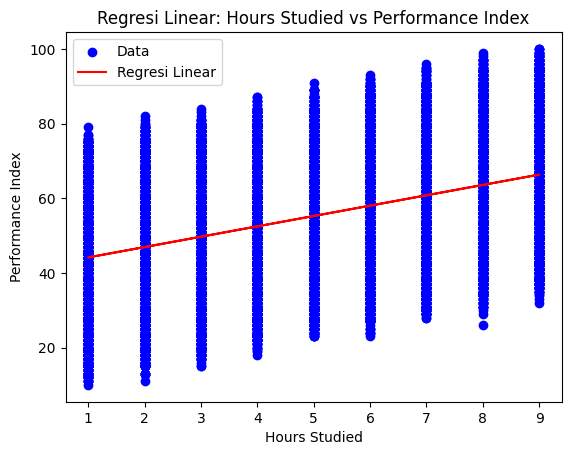

RMSE (Regresi Linear): 17.819474832547773


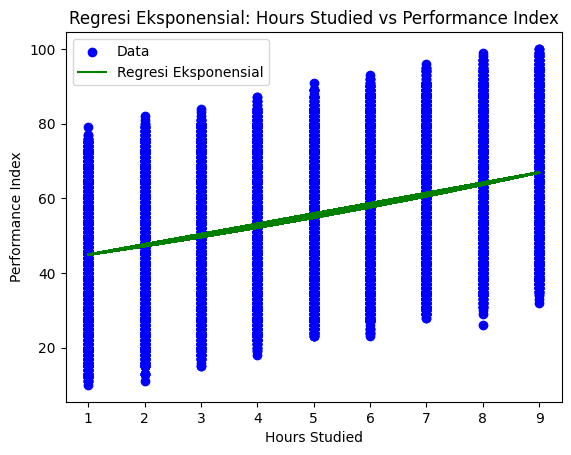

RMSE (Regresi Eksponensial): 17.82862874184698

- RMSE untuk Regresi Linear: 17.819474832547773
- RMSE untuk Regresi Eksponensial: 17.82862874184698


Dari hasil yang diperoleh, dapat dilihat bahwa regresi linear memiliki RMSE yang lebih kecil. Hal ini menunjukkan bahwa model linear lebih baik dalam memprediksi nilai ujian berdasarkan durasi waktu belajar siswa.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Impor data dari file CSV
file_path = 'Student_Performance.csv'  # ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Ekstrak kolom yang dibutuhkan
TB = data['Hours Studied']
NT = data['Performance Index']

# Reshape data
TB_reshaped = TB.values.reshape(-1, 1)
NT_reshaped = NT.values.reshape(-1, 1)

# 2. Implementasi Model
# Metode 1: Regresi Linear
linear_model = LinearRegression()
linear_model.fit(TB_reshaped, NT_reshaped)
NT_pred_linear = linear_model.predict(TB_reshaped)

# Plot hasil regresi linear
plt.scatter(TB, NT, color='blue', label='Data')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Regresi Linear: Hours Studied vs Performance Index')
plt.legend()
plt.show()

# Hitung RMSE untuk Regresi Linear
rmse_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
print(f'RMSE (Regresi Linear): {rmse_linear}')

# Metode 3: Regresi Eksponensial
# Fungsi eksponensial
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Cari parameter yang cocok untuk model eksponensial
params, covariance = curve_fit(exp_func, TB, NT)
a, b = params
NT_pred_exp = exp_func(TB, a, b)

# Plot hasil regresi eksponensial
plt.scatter(TB, NT, color='blue', label='Data')
plt.plot(TB, NT_pred_exp, color='green', label='Regresi Eksponensial')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Regresi Eksponensial: Hours Studied vs Performance Index')
plt.legend()
plt.show()

# Hitung RMSE untuk Regresi Eksponensial
rmse_exp = np.sqrt(mean_squared_error(NT, NT_pred_exp))
print(f'RMSE (Regresi Eksponensial): {rmse_exp}')



# Hasil Pengujian
hasil_pengujian = f"""
- RMSE untuk Regresi Linear: {rmse_linear}
- RMSE untuk Regresi Eksponensial: {rmse_exp}
"""

# Analisis Hasil
analisis_hasil = f"""
Dari hasil yang diperoleh, dapat dilihat bahwa {'regresi linear' if rmse_linear < rmse_exp else 'regresi eksponensial'} memiliki RMSE yang lebih kecil. Hal ini menunjukkan bahwa model {'linear' if rmse_linear < rmse_exp else 'eksponensial'} lebih baik dalam memprediksi nilai ujian berdasarkan durasi waktu belajar siswa.
"""

# Cetak dokumentasi dan analisis
print(hasil_pengujian)
print(analisis_hasil)
